# Libraries

In [1]:
import sys
from pathlib import Path

project_root = Path("..").resolve()
sys.path.append(str(project_root / "src"))

### reload the file after changes 

In [2]:
import importlib
import data
# importlib.reload(project_root / "src/data.py")
importlib.reload(data)
print("data module reloaded successfully")

data module reloaded successfully


In [3]:
import numpy as np 
import pandas as pd
from data import load_and_split_data
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sns.set_theme(style="whitegrid")

## call the data script

In [5]:
math_path = Path(project_root / "data/student-mat.csv")
portuguese_path = Path( project_root / "data/student-por.csv")

In [6]:

X_train_math, X_val_math, X_test_math, y_train_math, y_val_math, y_test_math = load_and_split_data(math_path)
X_train_port, X_val_port, X_test_port, y_train_port, y_val_port, y_test_port = load_and_split_data(portuguese_path)

data.print_split_shapes(
    "Math",X_train_math, X_val_math, X_test_math,
    y_train_math, y_val_math, y_test_math)

data.print_split_shapes(
    "Portuguese",X_train_port, X_val_port, X_test_port,
    y_train_port, y_val_port, y_test_port)

data.check_missing_data(math_path)
data.check_missing_data(portuguese_path)


Math dataset shapes
----------------------------------------
X_train: (275, 32)
y_train: (275,)
X_val  : (60, 32)
y_val  : (60,)
X_test : (60, 32)
y_test : (60,)

Portuguese dataset shapes
----------------------------------------
X_train: (453, 32)
y_train: (453,)
X_val  : (98, 32)
y_val  : (98,)
X_test : (98, 32)
y_test : (98,)

MISSING VALUES REPORT

--- By Column ---
Clean! No missing values found in any column.

--- By Row ---
Total rows with missing data: 0 out of 395


MISSING VALUES REPORT

--- By Column ---
Clean! No missing values found in any column.

--- By Row ---
Total rows with missing data: 0 out of 649



# EDA 
    - EDA answers: “What will my model struggle with?”

In [7]:
X_train_math.head()

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,romantic,famrel,freetime,goout,dalc,walc,health,absences,g1,g2
299,GP,M,18,U,LE3,T,4,4,teacher,teacher,...,yes,1,4,2,2,2,1,5,16,15
111,GP,F,16,R,GT3,T,3,3,services,other,...,no,4,1,2,1,1,2,0,7,10
174,GP,F,16,U,LE3,T,3,3,other,other,...,no,4,4,5,1,1,4,4,10,11
319,GP,F,18,U,GT3,T,4,4,teacher,other,...,no,4,4,4,3,3,5,2,11,11
144,GP,M,17,U,GT3,T,2,1,other,other,...,no,5,4,5,1,2,5,0,5,0


the math and Portuguese score data is the same so the main topics will see it in the math Data frame

In [8]:
X_train_port.head()

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,romantic,famrel,freetime,goout,dalc,walc,health,absences,g1,g2
191,GP,M,17,U,GT3,T,3,3,other,other,...,no,4,3,4,1,4,4,4,11,9
333,GP,F,17,U,GT3,T,1,1,services,teacher,...,no,4,3,3,1,1,3,0,13,13
515,MS,F,18,U,LE3,T,1,1,other,at_home,...,no,2,3,5,1,4,3,8,9,8
87,GP,F,15,U,GT3,T,4,2,other,other,...,no,5,3,3,1,3,1,4,15,15
88,GP,M,16,U,GT3,T,2,2,services,other,...,no,4,4,2,1,1,3,6,12,10


## Target Distribution
### let's start with the target column to see its distribution

i want to see the full target so I need to get the full data before i split it

In [9]:
math_df = pd.read_csv(math_path , sep=';')
port_df = pd.read_csv(portuguese_path  , sep=';')

X_math = math_df.drop('G3', axis=1)
y_math = math_df['G3']


X_port = port_df.drop('G3', axis=1)
y_port = port_df['G3']


print(y_math.shape)
print(y_port.shape)

(395,)
(649,)


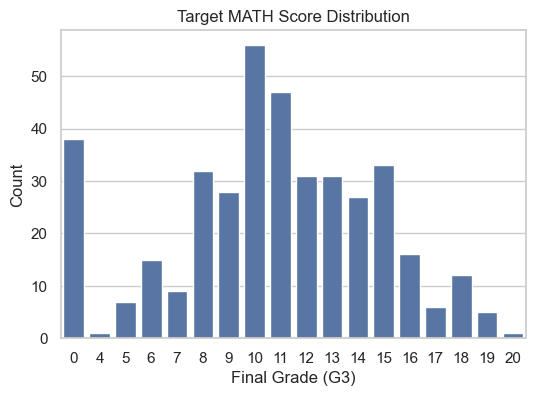

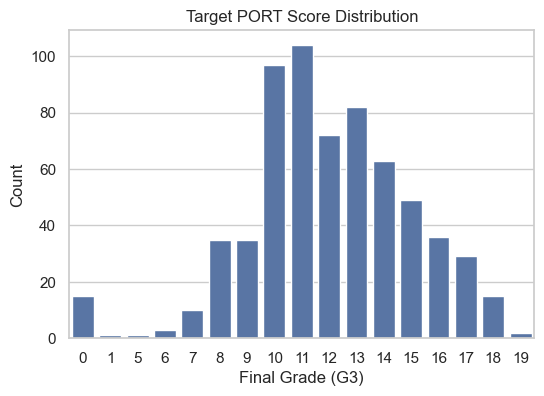

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x=y_math[:])
plt.xlabel("Final Grade (G3)")
plt.ylabel("Count")
plt.title("Target MATH Score Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x=y_port[:])
plt.xlabel("Final Grade (G3)")
plt.ylabel("Count")
plt.title("Target PORT Score Distribution")
plt.show()

`The Math dataset contains a significant number of zero scores, suggesting possible exam absence or failure cases.`

`Predictions at extreme scores (very high / very low) will be less reliable.`

📌 Target Distribution Analysis — Math (G3)

- The Math final grade (G3) ranges from 0 to 20 and exhibits an approximately bell-shaped distribution with a slight right skew.
The majority of students score between 9 and 13, with a noticeable concentration around grades 10–11.

- A significant number of students received a grade of 0, which likely represents exam absence or failure rather than normal score variation. This suggests that zero values may correspond to a distinct subgroup and should be treated carefully during modeling.

- Extreme high scores (18–20) are relatively rare, indicating that predictions at the upper tail may be less reliable.`

📌 Target Distribution Analysis — Portuguese (G3)

- The Portuguese final grade distribution is smoother and closer to a normal distribution compared to Math.
- Most scores fall between 10 and 14, with fewer zero-grade cases.

- The reduced frequency of zeros suggests fewer exam absences or failures, which may lead to more stable model training compared to the Math dataset.

- Overall, the Portuguese target appears less noisy and more evenly distributed.

## Feature Distribution
### PART A — NUMERIC FEATURES

In [11]:
num_cols_math = X_math.select_dtypes(include=["int64", "float64"]).columns
num_cols_port = X_port.select_dtypes(include=["int64", "float64"]).columns
# num_cols_math = num_cols_math.drop("G3")  # drop target
print(X_math[num_cols_math].shape)
print(X_port[num_cols_port].shape)

(395, 15)
(649, 15)


In [12]:
def plot_numeric_distributions(df, num_cols, cols_per_row=3):
    n = len(num_cols)
    rows = int(np.ceil(n / cols_per_row))

    plt.figure(figsize=(cols_per_row * 5, rows * 3))

    for i, col in enumerate(num_cols, 1):
        plt.subplot(rows, cols_per_row, i)

        sns.histplot(
            df[col],
            bins=20,
            kde=True,
            stat="count",
            color="#4C72B0",
            edgecolor="black",
            
        )

        plt.title(col, fontsize=11)
        plt.xlabel("")
        plt.ylabel("")

    plt.tight_layout()
    plt.show()


#### MATH

Math Numerical Feature Distributions:


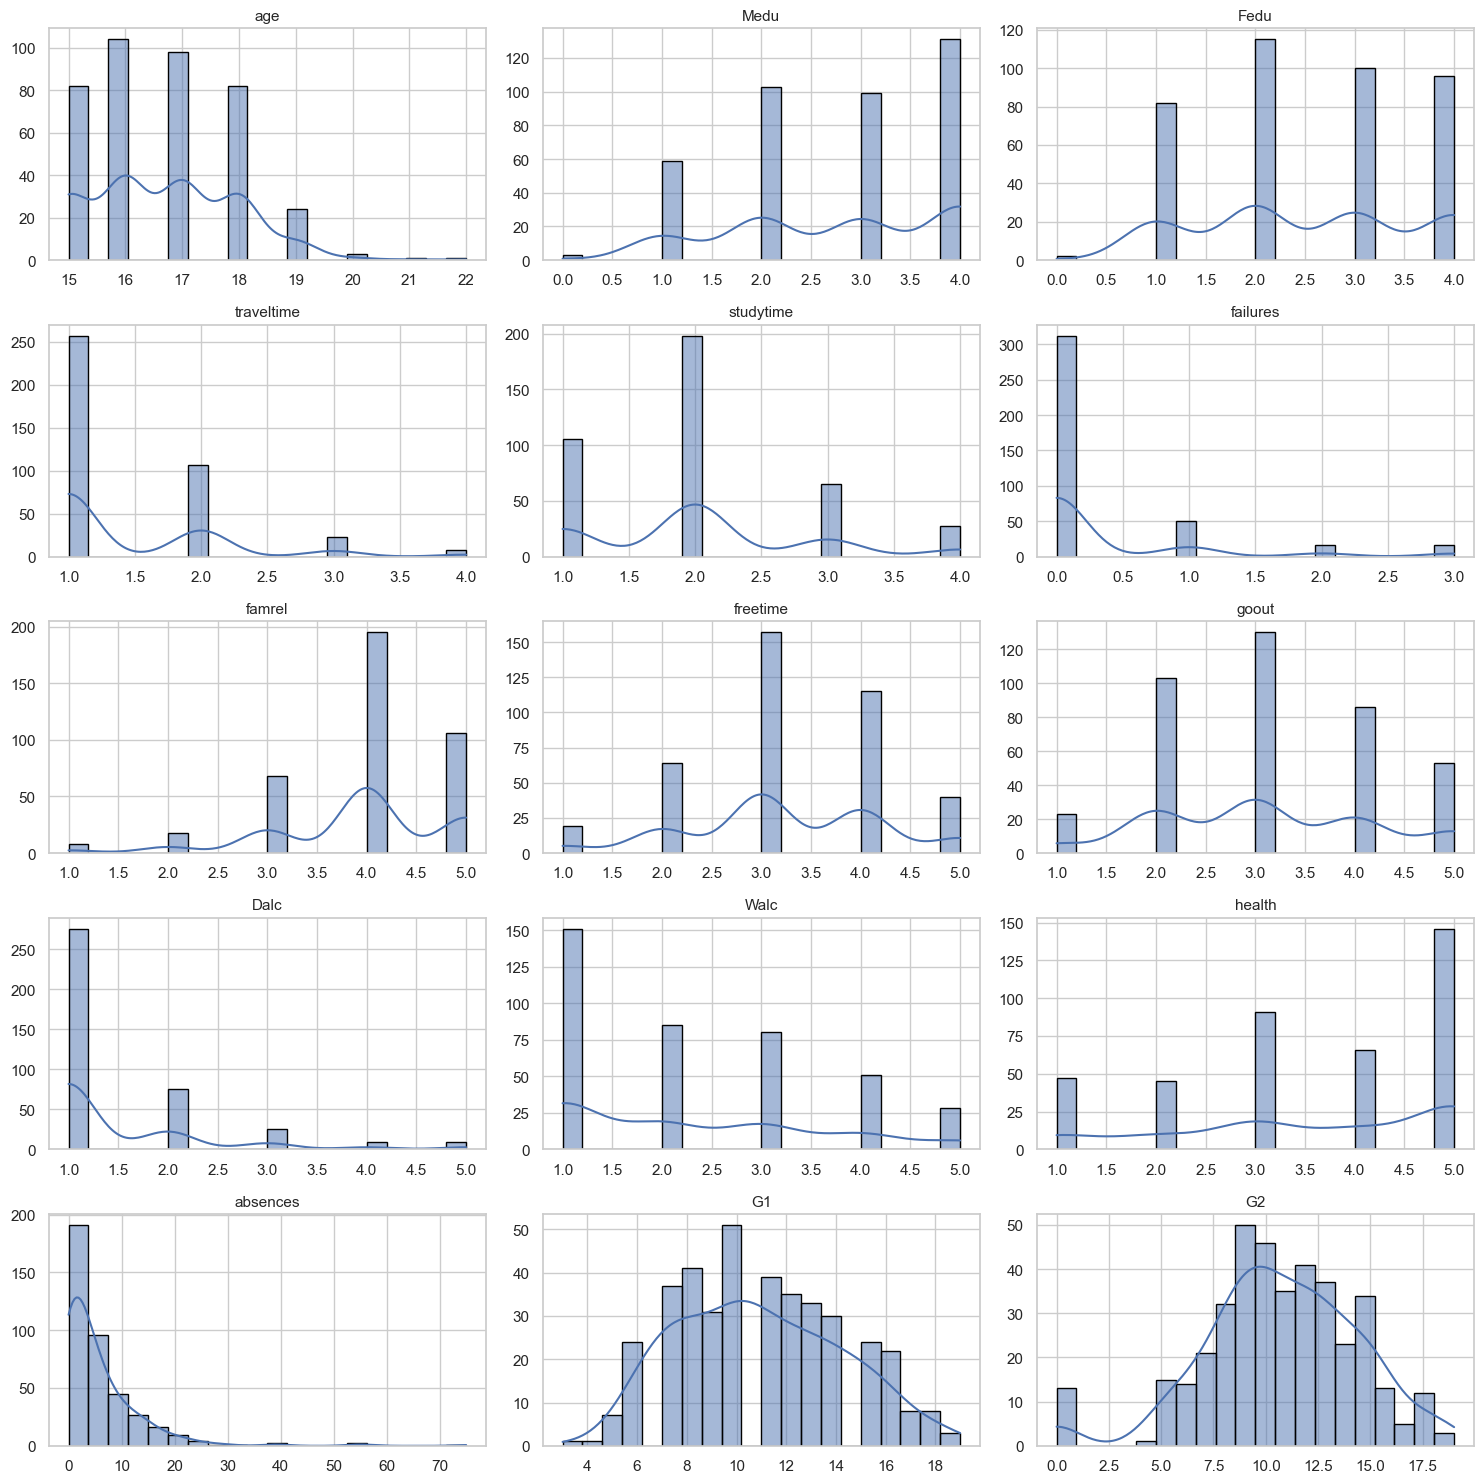

In [13]:
print("Math Numerical Feature Distributions:")
plot_numeric_distributions(X_math, num_cols_math)

In [14]:
def plot_numeric_boxplots(df, num_cols, cols_per_row=3):
    n = len(num_cols)
    rows = int(np.ceil(n / cols_per_row))

    plt.figure(figsize=(cols_per_row * 5, rows * 2.5))

    for i, col in enumerate(num_cols, 1):
        plt.subplot(rows, cols_per_row, i)

        sns.boxplot(
            x=df[col],
            color="#8DA0CB",
            fliersize=3
        )

        plt.title(col, fontsize=11)
        plt.xlabel("")

    plt.tight_layout()
    plt.show()

Math Numerical Feature Distributions:


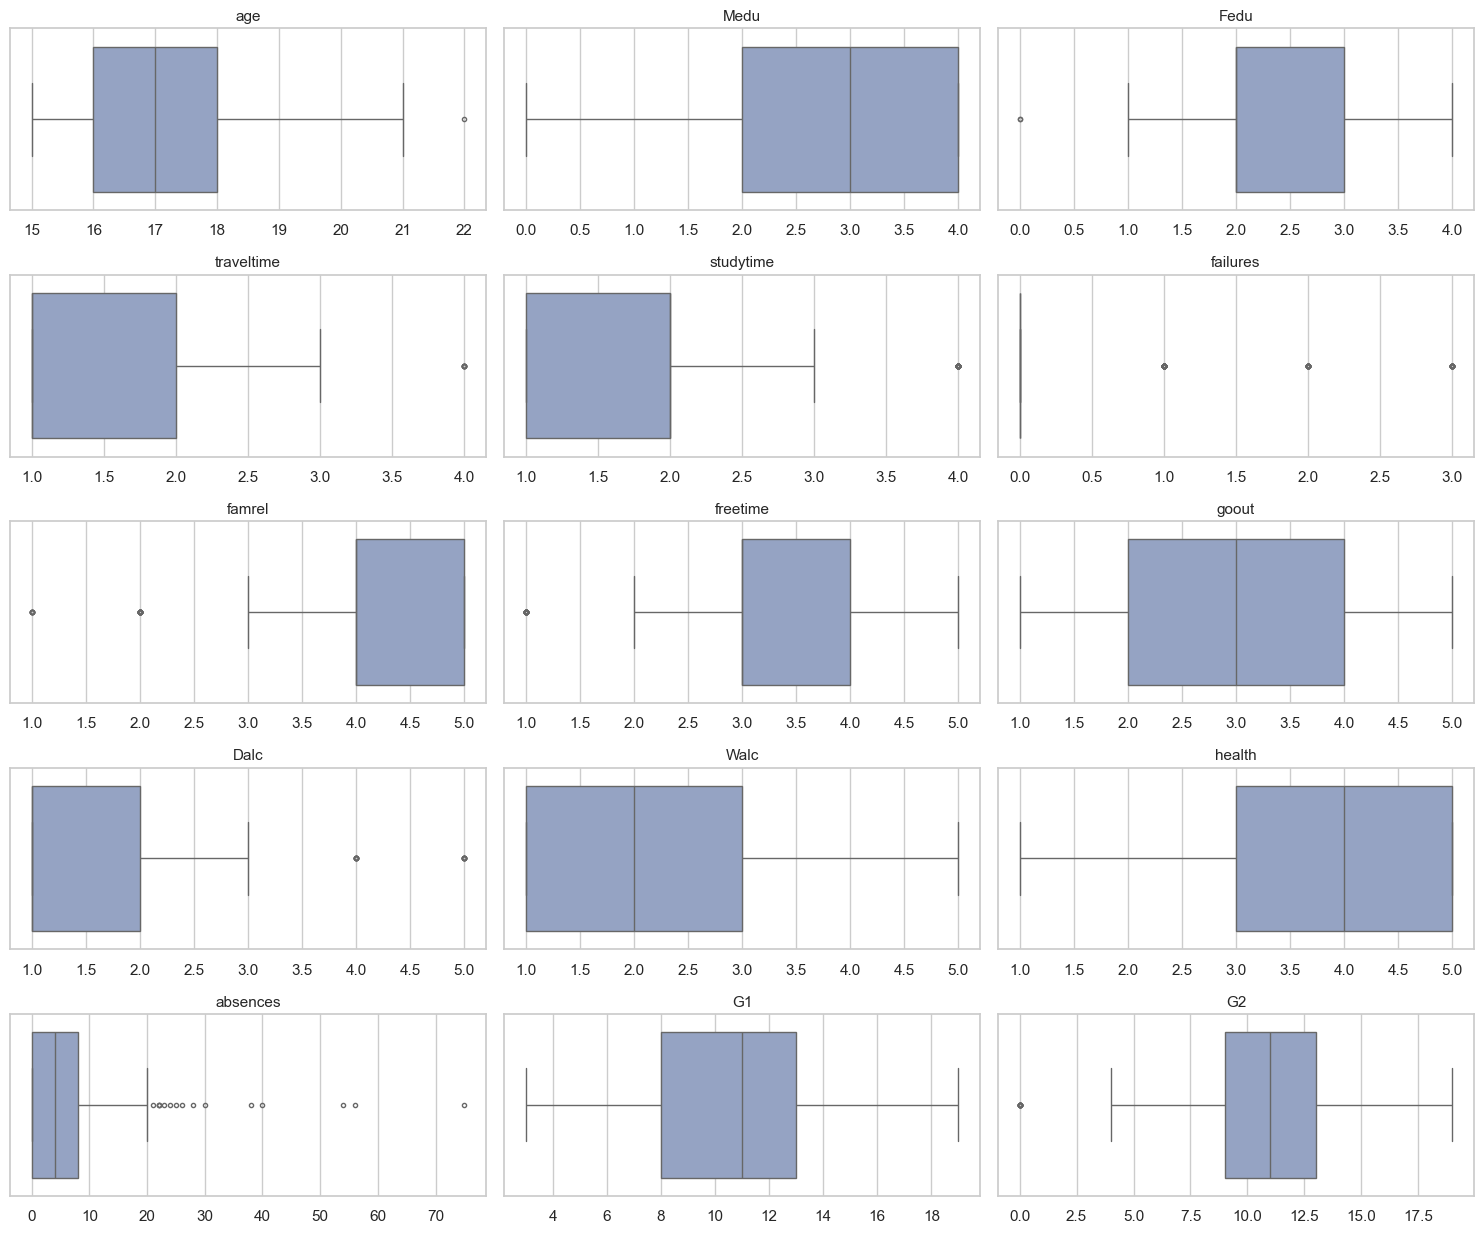

In [15]:
print("Math Numerical Feature Distributions:")
plot_numeric_boxplots(X_math, num_cols_math)

#### PORT

portugal Numerical Feature Distributions:


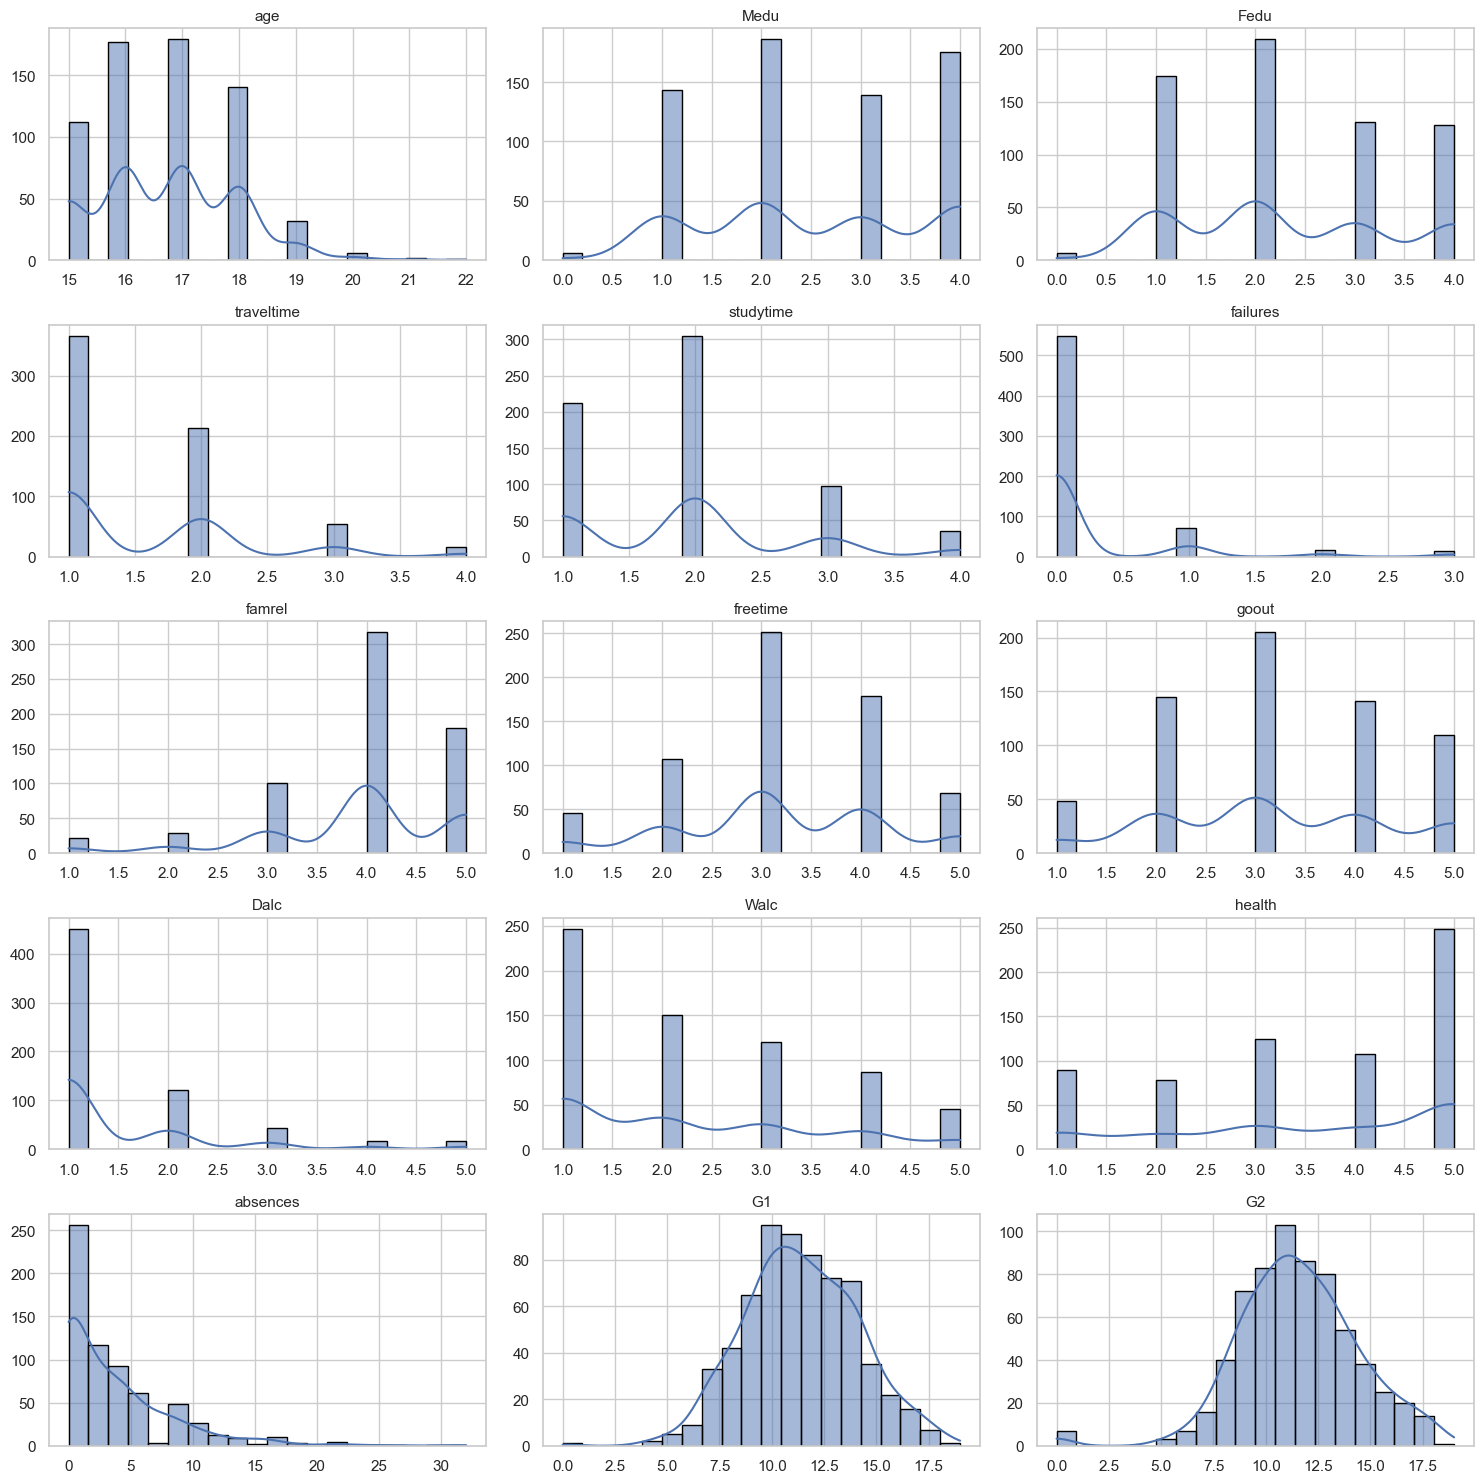

In [16]:
print("portugal Numerical Feature Distributions:")
plot_numeric_distributions(X_port, num_cols_port)

Math Numerical Feature Distributions:


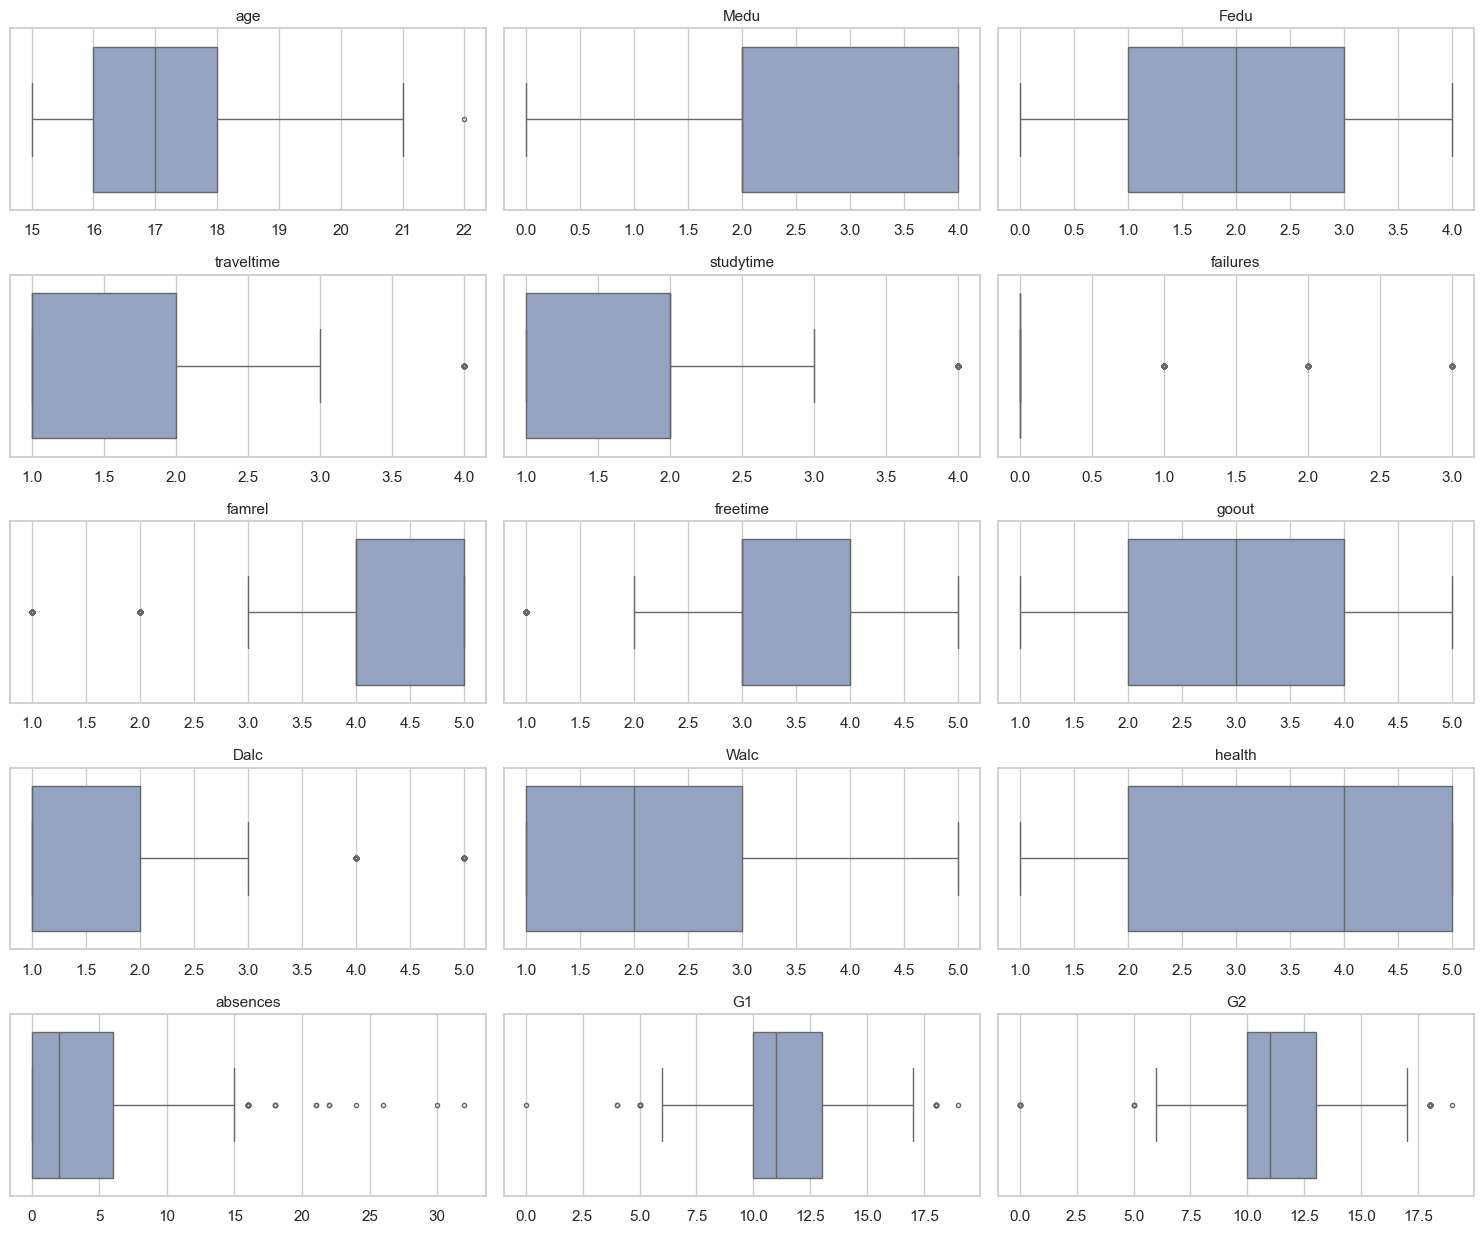

In [17]:
print("Math Numerical Feature Distributions:")
plot_numeric_boxplots(X_port, num_cols_port)

In [18]:
def plot_ordinal_features(df, cols):
    plt.figure(figsize=(len(cols) * 4, 3))

    for i, col in enumerate(cols, 1):
        plt.subplot(1, len(cols), i)
        sns.countplot(x=df[col], color="#4C72B0")
        plt.title(col)
        plt.xlabel("")
        plt.ylabel("")

    plt.tight_layout()
    plt.show()

### PART B — Category FEATURES     

In [19]:
cat_cols_math = X_math.select_dtypes(include="object").columns
cat_cols_port = X_port.select_dtypes(include="object").columns

print(cat_cols_math.shape)

(17,)


In [20]:
def plot_categorical_distributions(df, cat_cols, cols_per_row=4):
    n = len(cat_cols)
    rows = int(np.ceil(n / cols_per_row))

    plt.figure(figsize=(cols_per_row * 5, rows * 3))

    for i, col in enumerate(cat_cols, 1):
        plt.subplot(rows, cols_per_row, i)

        order = df[col].value_counts().index

        sns.countplot(
            x=df[col],
            order=order,
            color="#526FB4FF",
            
        )

        plt.title(col, fontsize=11)
        plt.xlabel("")
        plt.ylabel("Count")
        plt.xticks(rotation=45, ha="right")

    plt.tight_layout()
    plt.show()

#### MATH

Math Categorical Feature Distributions:


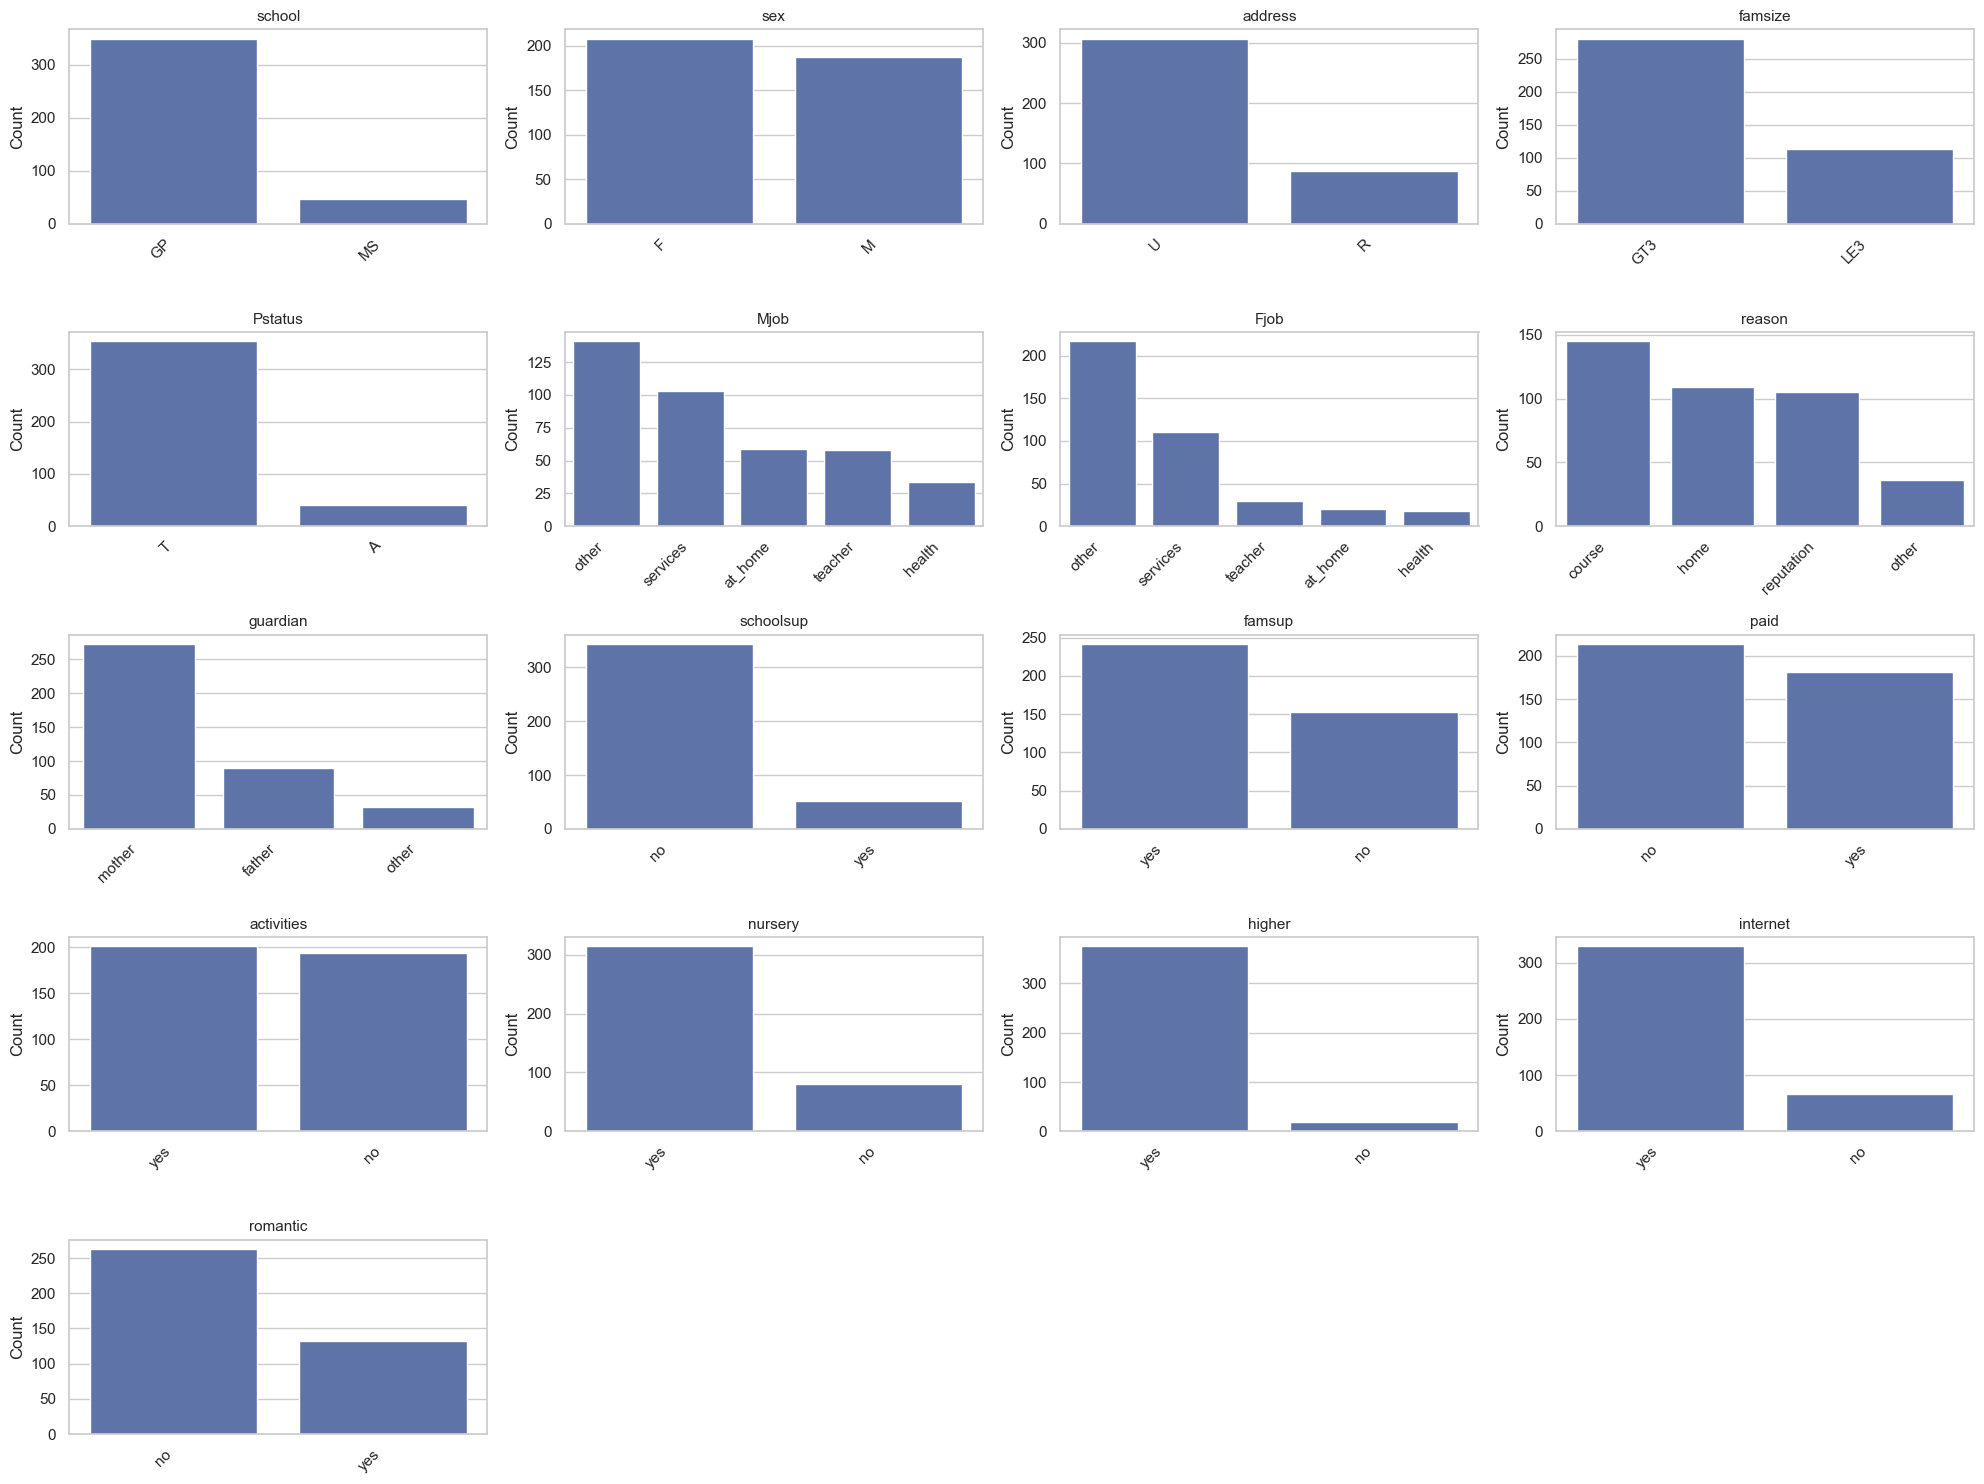

In [21]:
print("Math Categorical Feature Distributions:")
plot_categorical_distributions(X_math, cat_cols_math)

#### PORT

PORT Categorical Feature Distributions:


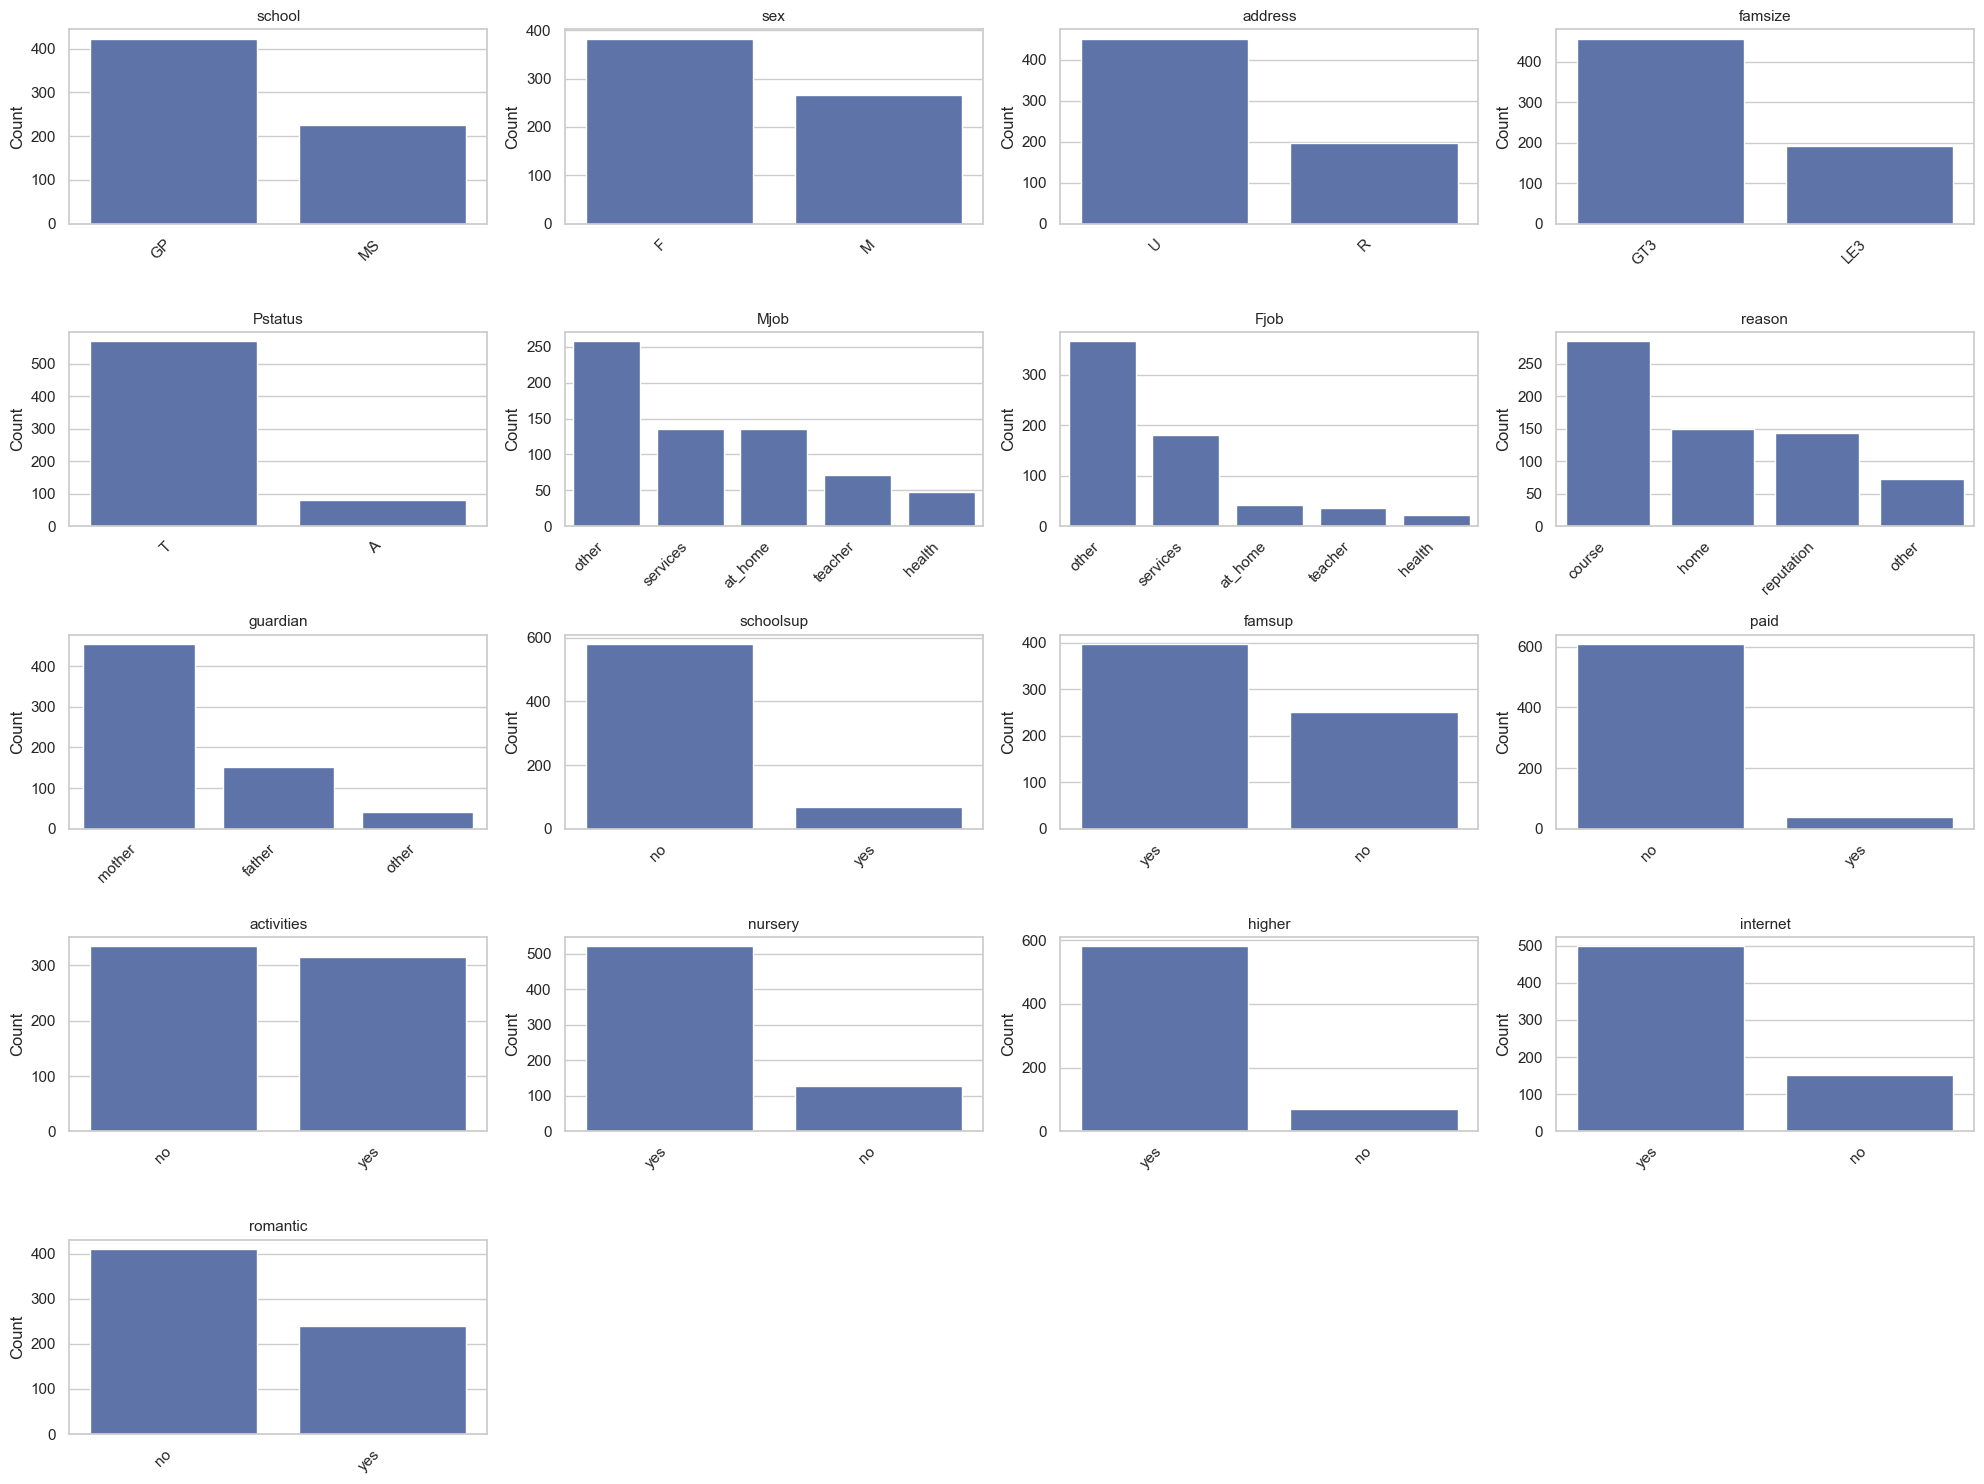

In [22]:
print("PORT Categorical Feature Distributions:")
plot_categorical_distributions(X_port, cat_cols_port)

`the features ['Pstatus','guardian','schoolsup','paid','nursery','higher','internet'] are heavily imbalanced, which may limit its predictive contribution.`

The categorical features exhibit varying degrees of imbalance, with several variables dominated by a single category.
Features with low entropy (e.g., paid classes, parental status, higher education intent) may have limited standalone predictive power, while socio-economic features such as address and parental occupation may act as strong but potentially biased predictors.
Rare categories present in some features could lead to unstable estimates and should be treated carefully during modeling.

## Categorical vs Target analysis

In [23]:
def plot_cat_vs_target(df, cat_cols, target, cols_per_row=4):
    n = len(cat_cols)
    rows = int(np.ceil(n / cols_per_row))

    plt.figure(figsize=(cols_per_row * 5, rows * 3))

    for i, col in enumerate(cat_cols, 1):
        plt.subplot(rows, cols_per_row, i)

        sns.boxplot(
            x=df[col],
            y=df[target],
            order=df[col].value_counts().index
        )

        plt.title(col, fontsize=11)
        plt.xlabel("")
        plt.ylabel(target)

        plt.xticks(rotation=45, ha="right")

    plt.tight_layout()
    plt.show()

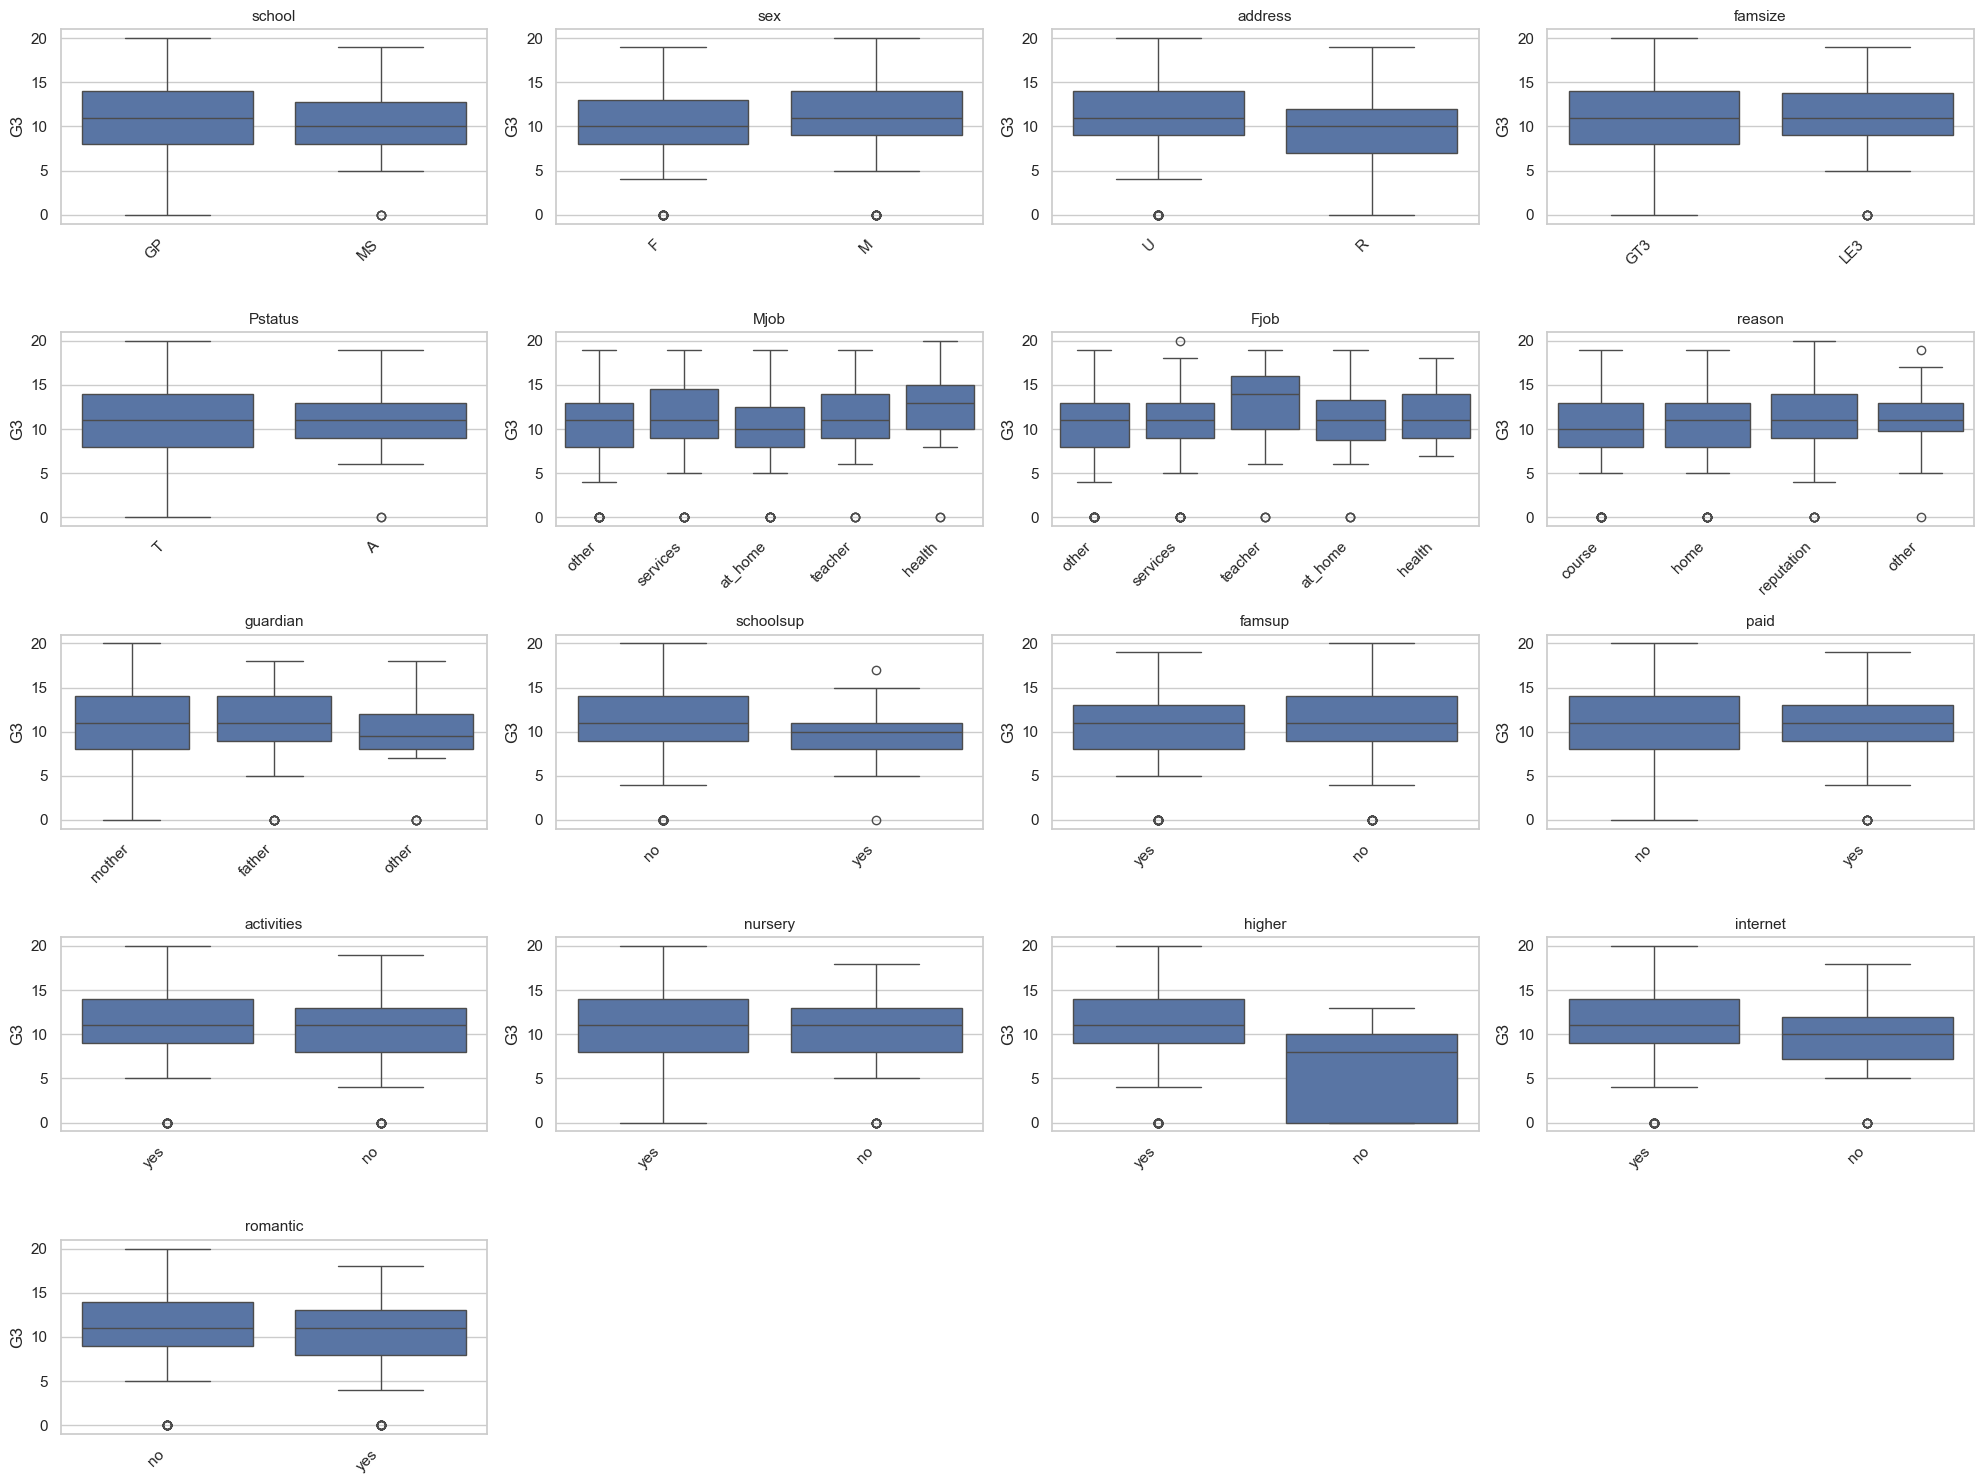

In [24]:
plot_cat_vs_target(math_df, cat_cols_math, target="G3")

In [25]:
for col in cat_cols_math:
    summary = (
        math_df.groupby(col)["G3"]
        .agg(["count", "mean", "median"])
        .sort_values("mean", ascending=False)
    )
    print(f"\n{col}")
    display(summary)


school


,count,mean,median
school,,,
GP,349,10.489971,11.0
MS,46,9.847826,10.0



sex


,count,mean,median
sex,,,
M,187,10.914439,11.0
F,208,9.966346,10.0



address


,count,mean,median
address,,,
U,307,10.674267,11.0
R,88,9.511364,10.0



famsize


,count,mean,median
famsize,,,
LE3,114,11.000000,11.0
GT3,281,10.177936,11.0



Pstatus


,count,mean,median
Pstatus,,,
A,41,11.195122,11.0
T,354,10.324859,11.0



Mjob


,count,mean,median
Mjob,,,
health,34,12.147059,13.0
teacher,58,11.051724,11.0
services,103,11.019417,11.0
other,141,9.822695,11.0
at_home,59,9.152542,10.0



Fjob


,count,mean,median
Fjob,,,
teacher,29,11.965517,14.0
health,18,11.611111,11.0
services,111,10.297297,11.0
other,217,10.193548,11.0
at_home,20,10.150000,11.0



reason


,count,mean,median
reason,,,
other,36,11.166667,11.0
reputation,105,11.142857,11.0
home,109,10.256881,11.0
course,145,9.820690,10.0



guardian


,count,mean,median
guardian,,,
father,90,10.688889,11.0
mother,273,10.483516,11.0
other,32,9.062500,9.5



schoolsup


,count,mean,median
schoolsup,,,
no,344,10.561047,11.0
yes,51,9.431373,10.0



famsup


,count,mean,median
famsup,,,
no,153,10.640523,11.0
yes,242,10.272727,11.0



paid


,count,mean,median
paid,,,
yes,181,10.922652,11.0
no,214,9.985981,11.0



activities


,count,mean,median
activities,,,
yes,201,10.487562,11.0
no,194,10.340206,11.0



nursery


,count,mean,median
nursery,,,
yes,314,10.535032,11.0
no,81,9.950617,11.0



higher


,count,mean,median
higher,,,
yes,375,10.608,11.0
no,20,6.800,8.0



internet


,count,mean,median
internet,,,
yes,329,10.617021,11.0
no,66,9.409091,10.0



romantic


,count,mean,median
romantic,,,
no,263,10.836502,11.0
yes,132,9.575758,11.0


## **Leakage detection**

one of the most important section in this dataset it is thinking more than coding 

`Leakage detection is about to understand every feature what will effect to the model training and how it will interact with the features maybe some features will have more wight the model will choose the easy way to prediction` 

`Leakage is about honesty, not optimization`

`[G1 , G2]`

You must explicitly define the prediction scenario:

- We assume that G1 and G2 are available at prediction time; therefore, they are retained as valid predictors. However, their strong correlation with G3 introduces a high risk of optimistic performance estimates.

OR, if excluded:

- To prevent information leakage and simulate an early prediction scenario, G1 and G2 are excluded from the feature set.

Both are acceptable — silence is not.

`failures`

- Reflects past academic failure

- Likely known before final exam

✅ Allowed, but:

- May act as a proxy for G1/G2

- Strong signal

**While valid, this feature captures historical performance and may `dominate` other predictors.**

`schoolsup`
- Often given because performance is low

This creates **reverse causality**, not leakage.

- Not leakage

- Confounding variable

**School support may reflect prior academic difficulty rather than directly influencing final grade.**

| Feature      | Leakage Risk | Decision             | Reason                |
| ------------ | ------------ | -------------------- | --------------------- |
| G1           | High         | Discussed / Optional | Prior exam grade      |
| G2           | High         | Discussed / Optional | Prior exam grade      |
| failures    | Medium       | Kept                 | Known before final    |
| schoolsup    | Medium       | Kept                 | Reflects intervention |
| paid         | Low          | Kept                 | No target info        |
| demographics | None         | Kept                 | Static attributes     |


## Correlation analysis 

Use Pearson here (standard)

In [26]:
corr_matrix = math_df[num_cols_math].corr(method="pearson")


### numeric vs numeric

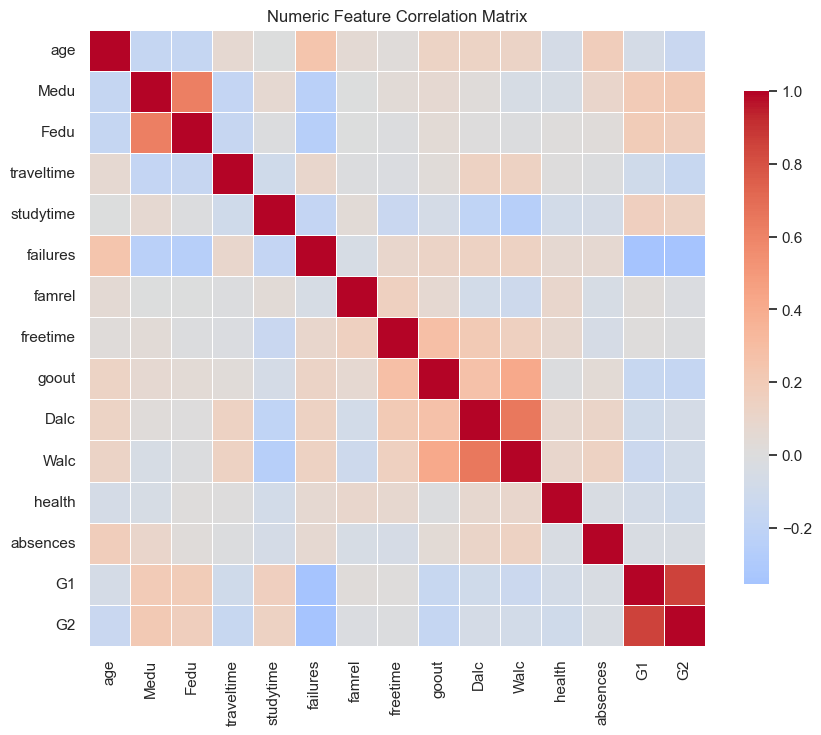

In [27]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Numeric Feature Correlation Matrix")
plt.show()

 - G1 ↔ G2 (very strong positive) : First and second period grades are highly correlated, indicating strong redundancy
and confirming that both capture similar academic performance signals. 

    `Both strongly risk target leakage when predicting G3`

- Dalc ↔ Walc (strong positive) : Alcohol consumption variables are strongly correlated, suggesting overlapping behavioral information.

    - Multicollinearity risk for linear models

    - Tree models will handle it fine


**overall**
- The correlation analysis reveals a small number of strongly correlated feature pairs, notably early academic performance indicators (G1, G2) and alcohol consumption variables (Dalc, Walc). Aside from these clusters, most numeric features show weak correlations, suggesting that multicollinearity is limited and unlikely to pose major issues for most models.

### numeric vs target

In [28]:
target_corr = (
    math_df[num_cols_math.tolist() + ["G3"]]
    .corr()["G3"]
    .drop("G3")
    .sort_values(key=abs, ascending=False)
)

target_corr

G2            0.904868
G1            0.801468
failures     -0.360415
Medu          0.217147
age          -0.161579
Fedu          0.152457
goout        -0.132791
traveltime   -0.117142
studytime     0.097820
health       -0.061335
Dalc         -0.054660
Walc         -0.051939
famrel        0.051363
absences      0.034247
freetime      0.011307
Name: G3, dtype: float64

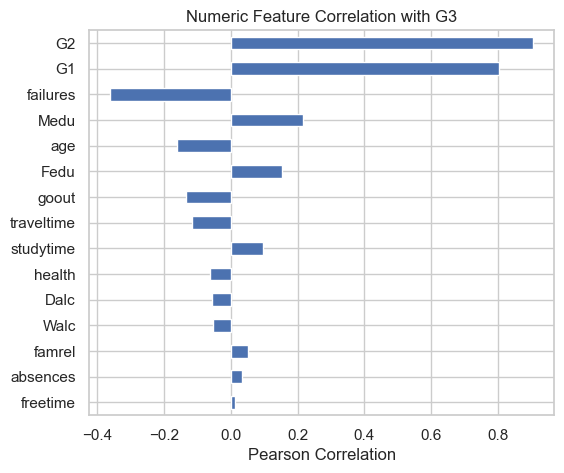

In [29]:
plt.figure(figsize=(6, 5))
target_corr.plot(kind="barh")
plt.title("Numeric Feature Correlation with G3")
plt.xlabel("Pearson Correlation")
plt.gca().invert_yaxis()
plt.show()

- `G2` — strongest positive correlation 
    - Extremely high correlation with G3 
    - Second-period grades are the strongest predictor of final performance, reflecting cumulative academic assessment rather than an independent explanatory factor.
    - Massive leakage risk depending on prediction timing
    - **Will dominate almost any model**
- `failures` — strong negative correlation
    - Clear, meaningful inverse relationship
    - Past academic failures show a strong negative association with final grades, indicating persistent academic difficulty.
    - This is a historical signal
    - Not leakage
    - Likely to remain useful even if G1/G2 are removed
- Moderate, meaningful signals **(the “real” predictors)**
    - Medu / Fedu
    - studytime
    - age
- Weak or negligible correlations **(noise alone)**
    - freetime
    - famrel
    - health
    - absences 
    - Dalc, Walc
    - goout
    - traveltime


The numeric–target correlation analysis highlights early academic performance indicators (G1 and G2) as dominant predictors, raising potential leakage concerns depending on the prediction scenario. Past failures emerge as the strongest non-leakage predictor, while socio-economic factors such as parental education show moderate associations. Most lifestyle-related variables exhibit weak linear relationships, indicating that their contribution may arise primarily through interactions rather than direct effects.

*Two modeling scenarios are justified:*

- With G1/G2 → upper-bound performance

- Without G1/G2 → realistic early prediction

- `failures`, `Medu`, `studytime`, `age` are core predictors

- Linear models may underuse weakly correlated features

- Tree-based models are well-suited